<a href="https://colab.research.google.com/github/Felixwkk/cornoavirus/blob/master/coronavirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://ncov.dxy.cn/ncovh5/view/pneumonia
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from matplotlib import font_manager

fontP = font_manager.FontProperties()
fontP.set_family('SimHei')
fontP.set_size(14)
from matplotlib import pyplot as plt

headers = {'Accept-Language': 'en-US,en;q=0.8'}

page = requests.get('https://ncov.dxy.cn/ncovh5/view/pneumonia', headers=headers)
soup = BeautifulSoup(page.content, "html.parser")


In [2]:
[type(item) for item in list(soup.children)]

[bs4.element.Doctype, bs4.element.Tag]

In [0]:
html = soup.find('body').get_text()

In [0]:
html 

'try { window.getListByCountryTypeService2 = [{"id":884086,"createTime":1583645254000,"modifyTime":1583645254000,"tags":"","countryType":2,"continents":"亚洲","provinceId":"7","provinceName":"韩国","provinceShortName":"","cityName":"","currentConfirmedCount":6976,"confirmedCount":7134,"suspectedCount":0,"curedCount":108,"deadCount":50,"comment":"","sort":0,"operator":"zhangjing1","locationId":951004,"countryShortCode":"KOR"},{"id":884099,"createTime":1583645254000,"modifyTime":1583645254000,"tags":"","countryType":2,"continents":"欧洲","provinceId":"10","provinceName":"意大利","provinceShortName":"","cityName":"","currentConfirmedCount":5061,"confirmedCount":5883,"suspectedCount":0,"curedCount":589,"deadCount":233,"comment":"","sort":0,"operator":"zhangjing1","locationId":965008,"countryShortCode":"ITA"},{"id":884129,"createTime":1583645254000,"modifyTime":1583645254000,"tags":"","countryType":2,"continents":"亚洲","provinceId":"10","provinceName":"伊朗","provinceShortName":"","cityName":"","curren

In [0]:
html = html.split('tags') # convert to a list of records
del html[0] # remove the first row

In [0]:
rows = ['Country Type', 'Continents', 'Province Name', 'Province Short Name', 'City Name', 'ConfirmedCount','SuspectedCount', 'CuredCount','DeadCount']

In [6]:
table = pd.DataFrame(sub.split(',') for sub in html) # split by commas
row_val, column_val = table.shape
column_val

3699

In [7]:
table = table.drop(columns=0) # remove not required first columns
table.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,3659,3660,3661,3662,3663,3664,3665,3666,3667,3668,3669,3670,3671,3672,3673,3674,3675,3676,3677,3678,3679,3680,3681,3682,3683,3684,3685,3686,3687,3688,3689,3690,3691,3692,3693,3694,3695,3696,3697,3698
0,"""countryType"":2","""continents"":""欧洲""","""provinceId"":""10""","""provinceName"":""意大利""","""provinceShortName"":""""","""cityName"":""""","""currentConfirmedCount"":20603","""confirmedCount"":24747","""suspectedCount"":0","""curedCount"":2335","""deadCount"":1809","""comment"":""""","""sort"":0","""operator"":""wangjinyuan""","""locationId"":965008","""countryShortCode"":""ITA""","""countryFullName"":""Italy""","""statisticsData"":""https://file1.dxycdn.com/202...","{""id"":1106523","""createTime"":1584318355000","""modifyTime"":1584318355000","""",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,"""countryType"":2","""continents"":""亚洲""","""provinceId"":""10""","""provinceName"":""伊朗""","""provinceShortName"":""""","""cityName"":""""","""currentConfirmedCount"":8624","""confirmedCount"":13938","""suspectedCount"":0","""curedCount"":4590","""deadCount"":724","""comment"":""""","""sort"":0","""operator"":""wangjinyuan""","""locationId"":955007","""countryShortCode"":""IRN""","""countryFullName"":""Iran (Islamic Republic of)""","""statisticsData"":""https://file1.dxycdn.com/202...","{""id"":1106480","""createTime"":1584318355000","""modifyTime"":1584318355000","""",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,"""countryType"":2","""continents"":""亚洲""","""provinceId"":""7""","""provinceName"":""韩国""","""provinceShortName"":""""","""cityName"":""""","""currentConfirmedCount"":7253","""confirmedCount"":8162","""suspectedCount"":0","""curedCount"":834","""deadCount"":75","""comment"":""""","""sort"":0","""operator"":""wangjinyuan""","""locationId"":951004","""countryShortCode"":""KOR""","""countryFullName"":""Republic of Korea""","""statisticsData"":""https://file1.dxycdn.com/202...","{""id"":1106495","""createTime"":1584318355000","""modifyTime"":1584318355000","""",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,"""countryType"":2","""continents"":""欧洲""","""provinceId"":""10""","""provinceName"":""西班牙""","""provinceShortName"":""""","""cityName"":""""","""currentConfirmedCount"":6894","""confirmedCount"":7753","""suspectedCount"":0","""curedCount"":571","""deadCount"":288","""comment"":""""","""sort"":0","""operator"":""wangjinyuan""","""locationId"":965015","""countryShortCode"":""ESP""","""countryFullName"":""Spain""","""statisticsData"":""https://file1.dxycdn.com/202...","{""id"":1106487","""createTime"":1584318355000","""modifyTime"":1584318355000","""",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,"""countryType"":2","""continents"":""欧洲""","""provinceId"":""10""","""provinceName"":""德国""","""provinceShortName"":""""","""cityName"":""""","""currentConfirmedCount"":5483","""confirmedCount"":5508","""suspectedCount"":0","""curedCo

In [0]:
table.drop(table.columns[10:column_val], axis = 1, inplace = True)

In [9]:
table.drop(columns = 3, inplace = True)
table.head()

,1,2,4,5,6,7,8,9,10
0,"""countryType"":2","""continents"":""欧洲""","""provinceName"":""意大利""","""provinceShortName"":""""","""cityName"":""""","""currentConfirmedCount"":20603","""confirmedCount"":24747","""suspectedCount"":0","""curedCount"":2335"
1,"""countryType"":2","""continents"":""亚洲""","""provinceName"":""伊朗""","""provinceShortName"":""""","""cityName"":""""","""currentConfirmedCount"":8624","""confirmedCount"":13938","""suspectedCount"":0","""curedCount"":4590"
2,"""countryType"":2","""continents"":""亚洲""","""provinceName"":""韩国""","""provinceShortName"":""""","""cityName"":""""","""currentConfirmedCount"":7253","""confirmedCount"":8162","""suspectedCount"":0","""curedCount"":834"
3,"""countryType"":2","""continents"":""欧洲""","""provinceName"":""西班牙""","""provinceShortName"":""""","""cityName"":""""","""currentConfirmedCount"":6894","""confirmedCount"":7753","""suspectedCount"":0","""curedCount"":571"
4,"""countryType"":2","""continents"":""欧洲""","""provinceName"":""德国""","""provinceShortName"":""""","""cityName"":""""","""currentConfirmedCount"":5483","""confirmedCount"":5508","""suspectedCount"":0","""curedCount"":14"


In [0]:
table.columns = rows

In [11]:
table.head()

,Country Type,Continents,Province Name,Province Short Name,City Name,ConfirmedCount,SuspectedCount,CuredCount,DeadCount
0,"""countryType"":2","""continents"":""欧洲""","""provinceName"":""意大利""","""provinceShortName"":""""","""cityName"":""""","""currentConfirmedCount"":20603","""confirmedCount"":24747","""suspectedCount"":0","""curedCount"":2335"
1,"""countryType"":2","""continents"":""亚洲""","""provinceName"":""伊朗""","""provinceShortName"":""""","""cityName"":""""","""currentConfirmedCount"":8624","""confirmedCount"":13938","""suspectedCount"":0","""curedCount"":4590"
2,"""countryType"":2","""continents"":""亚洲""","""provinceName"":""韩国""","""provinceShortName"":""""","""cityName"":""""","""currentConfirmedCount"":7253","""confirmedCount"":8162","""suspectedCount"":0","""curedCount"":834"
3,"""countryType"":2","""continents"":""欧洲""","""provinceName"":""西班牙""","""provinceShortName"":""""","""cityName"":""""","""currentConfirmedCount"":6894","""confirmedCount"":7753","""suspectedCount"":0","""curedCount"":571"
4,"""countryType"":2","""continents"":""欧洲""","""provinceName"":""德国""","""provinceShortName"":""""","""cityName"":""""","""currentConfirmedCount"":5483","""confirmedCount"":5508","""suspectedCount"":0","""curedCount"":14"


In [12]:

table['Country Type'] = table["Country Type"].str.replace('"countryType":', "")
table['Continents'] = table['Continents'].str.replace('"continents":"','')
table['Continents'] = table['Continents'].str.replace('"','')
table['Province Name'] = table['Province Name'].str.replace('"provinceName":"','')
table['Province Name'] = table['Province Name'].str.replace('"','')
table['Province Short Name']= table['Province Short Name'].str.replace('"provinceShortName":','')
table['City Name'] = table['City Name'].str.replace('"cityName":','')
table['ConfirmedCount']= table['ConfirmedCount'].str.replace('"currentConfirmedCount":','')
table['SuspectedCount']= table['SuspectedCount'].str.replace('"confirmedCount":','')
table['CuredCount']=table['CuredCount'].str.replace('"suspectedCount":','')
table['DeadCount']= table['DeadCount'].str.replace('"curedCount":','')
table.head()

,Country Type,Continents,Province Name,Province Short Name,City Name,ConfirmedCount,SuspectedCount,CuredCount,DeadCount
0,2,欧洲,意大利,"""""","""""",20603,24747,0,2335
1,2,亚洲,伊朗,"""""","""""",8624,13938,0,4590
2,2,亚洲,韩国,"""""","""""",7253,8162,0,834
3,2,欧洲,西班牙,"""""","""""",6894,7753,0,571
4,2,欧洲,德国,"""""","""""",5483,5508,0,14


In [0]:
table['Continents'] = table['Continents'].str.replace('亚洲','Asia')
table['Continents'] = table['Continents'].str.replace('大洋洲', 'Oceania')
table['Continents'] = table['Continents'].str.replace('北美洲', 'North Americas')
table['Continents'] = table['Continents'].str.replace('欧洲', 'Europe')
table['Continents'] = table['Continents'].str.replace('其他', ' Other')
table['Continents'] = table['Continents'].str.replace('南美洲','South America' )
table['Continents'] = table['Continents'].str.replace('非洲','Africa')

table['Province Name'] = table['Province Name'].str.replace('日本','Japan')
table['Province Name'] = table['Province Name'].str.replace('泰国','Thailand')
table['Province Name'] = table['Province Name'].str.replace('新加坡', 'Singapore')
table['Province Name'] = table['Province Name'].str.replace('韩国','Korea')
table['Province Name'] = table['Province Name'].str.replace('澳大利亚','Australia')
table['Province Name'] = table['Province Name'].str.replace('德国','Germany')
table['Province Name'] = table['Province Name'].str.replace('美国', 'USA')
table['Province Name'] = table['Province Name'].str.replace('马来西亚', 'Malaysia')
table['Province Name'] = table['Province Name'].str.replace('法国','France')
table['Province Name'] = table['Province Name'].str.replace('越南', 'Vietnam')
table['Province Name'] = table['Province Name'].str.replace('阿联酋','United Arab Emirates')
table['Province Name'] = table['Province Name'].str.replace('加拿大','Canada')
table['Province Name'] = table['Province Name'].str.replace('印度','India')
table['Province Name'] = table['Province Name'].str.replace('意大利', 'Itlay')
table['Province Name'] = table['Province Name'].str.replace('英国', 'England')
table['Province Name'] = table['Province Name'].str.replace('俄罗斯','Russia')
table['Province Name'] = table['Province Name'].str.replace('菲律宾', 'Philippines')
table['Province Name'] = table['Province Name'].str.replace('尼泊尔','Nepal')
table['Province Name'] = table['Province Name'].str.replace('柬埔寨','Cambodia')
table['Province Name'] = table['Province Name'].str.replace('斯里兰卡', 'Sri Lanka')
table['Province Name'] = table['Province Name'].str.replace('芬兰', 'Finland')
table['Province Name'] = table['Province Name'].str.replace('西班牙', 'Spain')
table['Province Name'] = table['Province Name'].str.replace('瑞典','Sweden')
table['Province Name'] = table['Province Name'].str.replace('比利时', 'Belgium')
table['Province Name'] = table['Province Name'].str.replace('钻石公主号邮轮', 'Diamond Princess Cruises')
table['Province Name'] = table['Province Name'].str.replace('科威特','Kuwait')
table['Province Name'] = table['Province Name'].str.replace('瑞士', 'Switzerland')
table['Province Name'] = table['Province Name'].str.replace('巴林', 'Bahrain')
table['Province Name'] = table['Province Name'].str.replace('伊拉克','Iraq')
table['Province Name'] = table['Province Name'].str.replace('挪威', 'Norway')
table['Province Name'] = table['Province Name'].str.replace('奥地利',' Austria')
table['Province Name'] = table['Province Name'].str.replace('荷兰', 'Netherlands')
table['Province Name'] = table['Province Name'].str.replace('厄瓜多尔','Eucadar')
table['Province Name'] = table['Province Name'].str.replace('阿曼	', 'Oman')
table['Province Name'] = table['Province Name'].str.replace('青海省', '青海省 Qing Hai')
table['Province Name'] = table['Province Name'].str.replace('新疆维吾尔自治区', '新疆维吾尔自治区 Xinjiang Uygur')
table['Province Name'] = table['Province Name'].str.replace('宁夏回族自治区', '宁夏回族自治区 Ningxia Hui')
table['Province Name'] = table['Province Name'].str.replace('内蒙古自治区', '内蒙古自治区 Inner Mongolia')
table['Province Name'] = table['Province Name'].str.replace('西藏自治区', '西藏自治区 Tibet')
table['Province Name'] = table['Province Name'].str.replace('台湾', '台湾 Taiwan')
table['Province Name'] = table['Province Name'].str.replace('澳门','澳门 Macao')
table['Province Name'] = table['Province Name'].str.replace('香港','香港 Hong Kong')
table['Province Name'] = table['Province Name'].str.replace('吉林省','吉林省 Jilin')
table['Province Name'] = table['Province Name'].str.replace('甘肃省','甘肃省 Gansu')
table['Province Name'] = table['Province Name'].str.replace('贵州省', '贵州省 GuiZhou')
table['Province Name'] = table['Province Name'].str.replace('天津市','天津市 TianJin')
table['Province Name'] = table['Province Name'].str.replace('辽宁省', '辽宁省 Liao Ning')
table['Province Name'] = table['Province Name'].str.replace('山西省', '山西省 Shanxi')
table['Province Name'] = table['Province Name'].str.replace('海南省', '海南省 Hainan')
table['Province Name'] = table['Province Name'].str.replace('云南省','云南省 Yunnan')
table['Province Name'] = table['Province Name'].str.replace('河北省', '河北省 Hebei')
table['Province Name'] = table['Province Name'].str.replace('广西壮族自治区', '广西壮族自治区 GuangXi Zhuang')
table['Province Name'] = table['Province Name'].str.replace('陕西省', '陕西省 ShaanXi')
table['Province Name'] = table['Province Name'].str.replace('黑龙江省', '黑龙江省 HeiLongJiang')
table['Province Name'] = table['Province Name'].str.replace('福建省','福建省 FuJian')
table['Province Name'] = table['Province Name'].str.replace('北京市', '北京市 Beijing')
table['Province Name'] = table['Province Name'].str.replace('上海市','上海市 Shanghai')
table['Province Name'] = table['Province Name'].str.replace('山东省', '山东省 ShanDong')
table['Province Name'] = table['Province Name'].str.replace('四川省','四川省 Sichuan')
table['Province Name'] = table['Province Name'].str.replace('江苏省', '江苏省 JiangSu')
table['Province Name'] = table['Province Name'].str.replace('重庆市', '重庆市 Chong Qing')
table['Province Name'] = table['Province Name'].str.replace('江西省', '江西省 JiangXi')
table['Province Name'] = table['Province Name'].str.replace('安徽省', '安徽省 AnHui')
table['Province Name'] = table['Province Name'].str.replace('湖南省', '湖南省 Hunan')
table['Province Name'] = table['Province Name'].str.replace('河南省','河南省	Henan')
table['Province Name'] = table['Province Name'].str.replace('广东省','广东省 GuangDong')
table['Province Name'] = table['Province Name'].str.replace('浙江省', '浙江省 ZheJiang')
table['Province Name'] = table['Province Name'].str.replace('湖北省', '湖北省 Hubei')

table['Province Name'] = table['Province Name'].str.replace('以色列', 'Isreal')
table['Province Name'] = table['Province Name'].str.replace('克罗地亚', 'Croatia')
table['Province Name'] = table['Province Name'].str.replace('希腊','Greece')
table['Province Name'] = table['Province Name'].str.replace('阿曼','Oman')
table['Province Name'] = table['Province Name'].str.replace('新西兰','New Zealand')
table['Province Name'] = table['Province Name'].str.replace('冰岛','Iceland')
table['Province Name'] = table['Province Name'].str.replace('摩纳哥','Monaco')
table['Province Name'] = table['Province Name'].str.replace('卡塔尔', 'Qatar')
table['Province Name'] = table['Province Name'].str.replace('爱尔兰', 'Ireland')
table['Province Name'] = table['Province Name'].str.replace('卢森堡', 'Luxembourg')
table['Province Name'] = table['Province Name'].str.replace('圣马力诺', 'San Marino')
table['Province Name'] = table['Province Name'].str.replace('亚美尼亚', 'Armenia')
table['Province Name'] = table['Province Name'].str.replace('多米尼加','Dominca')
table['Province Name'] = table['Province Name'].str.replace('黎巴嫩','Lebanon')
table['Province Name'] = table['Province Name'].str.replace('伊朗', 'Iran')
table['Province Name'] = table['Province Name'].str.replace('丹麦', 'Denmark')
table['Province Name'] = table['Province Name'].str.replace('至尊公主邮轮','Extreme Princess Cruises')
table['Province Name'] = table['Province Name'].str.replace('阿尔及利亚','Algeria')
table['Province Name'] = table['Province Name'].str.replace('巴勒斯坦','Palestine')
table['Province Name'] = table['Province Name'].str.replace('葡萄牙','Portugal')
table['Province Name'] = table['Province Name'].str.replace('埃及','Eygpt')
table['Province Name'] = table['Province Name'].str.replace('罗马尼亚','Romania')
table['Province Name'] = table['Province Name'].str.replace('爱沙尼亚','Estonia')
table['Province Name'] = table['Province Name'].str.replace('阿根廷','Agrentina')
table['Province Name'] = table['Province Name'].str.replace('巴拉圭', 'Paraguay')
table['Province Name'] = table['Province Name'].str.replace('多哥','Togo')
table['Province Name'] = table['Province Name'].str.replace('哥伦比亚', 'Colombia')
table['Province Name'] = table['Province Name'].str.replace('哥斯达黎加','Costa Rica')
table['Province Name'] = table['Province Name'].str.replace('塞尔维亚','Serbia')
table['Province Name'] = table['Province Name'].str.replace('梵蒂冈','Vatican')
table['Province Name'] = table['Province Name'].str.replace('不丹','Bhutan')
table['Province Name'] = table['Province Name'].str.replace('拉脱维亚', 'Latvia')
table['Province Name'] = table['Province Name'].str.replace('突尼斯', 'Tunsia')
table['Province Name'] = table['Province Name'].str.replace('列支敦士登','Liechtenstein')
table['Province Name'] = table['Province Name'].str.replace('约旦','Jordan')
table['Province Name'] = table['Province Name'].str.replace('摩洛哥','Morocco')
table['Province Name'] = table['Province Name'].str.replace('乌克兰','Ukraine')
table['Province Name'] = table['Province Name'].str.replace('土耳其', 'Turkey')
table['Province Name'] = table['Province Name'].str.replace('巴拿马','Panama')
table['Province Name'] = table['Province Name'].str.replace('蒙古', 'Mongolia')
table['Province Name'] = table['Province Name'].str.replace('摩尔多瓦	','Moldova')
table['Province Name'] = table['Province Name'].str.replace('马耳他','Malta')
table['Province Name'] = table['Province Name'].str.replace('安道尔','Andora')
table['Province Name'] = table['Province Name'].str.replace('立陶宛','Lithuania')
table['Province Name'] = table['Province Name'].str.replace('塞浦路斯', 'Cyprus')
table['Province Name'] = table['Province Name'].str.replace('保加利亚','Bulgaria')
table['Province Name'] = table['Province Name'].str.replace('南非','South Africa')
table['Province Name'] = table['Province Name'].str.replace('喀麦隆','Cameroon')
table['Province Name'] = table['Province Name'].str.replace('波黑','BiH')
table['Province Name'] = table['Province Name'].str.replace('阿富汗','Afghanistan')
table['Province Name'] = table['Province Name'].str.replace('秘鲁','Peru')
table['Province Name'] = table['Province Name'].str.replace('马尔代夫','Maldives')
table['Province Name'] = table['Province Name'].str.replace('阿尔巴尼亚','Albania')
table['Province Name'] = table['Province Name'].str.replace('文莱', 'Brunei')
table['Province Name'] = table['Province Name'].str.replace('匈牙利','Hungary')
table['Province Name'] = table['Province Name'].str.replace('捷克','Czeh Republic')
table['Province Name'] = table['Province Name'].str.replace('沙特阿拉伯','Saudi Arbia')
table['Province Name'] = table['Province Name'].str.replace('巴西', 'Brazil')
table['Province Name'] = table['Province Name'].str.replace('波兰', 'Poland')
table['Province Name'] = table['Province Name'].str.replace('智利','Chile')
table['Province Name'] = table['Province Name'].str.replace('斯洛伐克','Slovakia')
table['Province Name'] = table['Province Name'].str.replace('苏丹','Sudan')
table['Province Name'] = table['Province Name'].str.replace('圭亚那','Guyana')
table['Province Name'] = table['Province Name'].str.replace('安提瓜和巴布达','Antigua')
table['Province Name'] = table['Province Name'].str.replace('斯威士兰','Swaziland')
table['Province Name'] = table['Province Name'].str.replace('毛里塔尼亚','Mauritania')
table['Province Name'] = table['Province Name'].str.replace('几内亚', 'Guinea')
table['Province Name'] = table['Province Name'].str.replace('赤道几内亚','Equatorial Guinea')
table['Province Name'] = table['Province Name'].str.replace('圣文森特和格林纳丁斯','Saint Vincent and the Grenadines')
table['Province Name'] = table['Province Name'].str.replace('苏里南','Suriname')
table['Province Name'] = table['Province Name'].str.replace('危地马拉','Guatamala')
table['Province Name'] = table['Province Name'].str.replace('法属波利尼西亚','French Polynesia')
table['Province Name'] = table['Province Name'].str.replace('根西岛','Guernsey')
table['Province Name'] = table['Province Name'].str.replace('直布罗陀','Gibraltar')
table['Province Name'] = table['Province Name'].str.replace('圣巴泰勒米', 'Barthelemy')
table['Province Name'] = table['Province Name'].str.replace('加蓬','Gabon')
table['Province Name'] = table['Province Name'].str.replace('巴基斯坦','Pakistan')
table['Province Name'] = table['Province Name'].str.replace('墨西哥','Mexico')
table['Province Name'] = table['Province Name'].str.replace('格鲁吉亚','Georgia')
table['Province Name'] = table['Province Name'].str.replace('阿塞拜疆','Azerbaijan')
table['Province Name'] = table['Province Name'].str.replace('北马其顿','North Macedonia')
table['Province Name'] = table['Province Name'].str.replace('塞内加尔','Senegal')
table['Province Name'] = table['Province Name'].str.replace('委内瑞拉','Venezuela')
table['Province Name'] = table['Province Name'].str.replace('哈萨克斯坦','Kazashtan')
table['Province Name'] = table['Province Name'].str.replace('加纳','Ghana')
table['Province Name'] = table['Province Name'].str.replace('乌拉圭','Uraguay')
table['Province Name'] = table['Province Name'].str.replace('孟加拉国','Bangladesh')
table['Province Name'] = table['Province Name'].str.replace('法属圭亚那','French Guiana')
table['Province Name'] = table['Province Name'].str.replace('卢旺达','Rwanda')
table['Province Name'] = table['Province Name'].str.replace('科特迪瓦','Ivory Coast')
table['Province Name'] = table['Province Name'].str.replace('古巴','Cuba')
table['Province Name'] = table['Province Name'].str.replace('牙买加','Jamaica')
table['Province Name'] = table['Province Name'].str.replace('特立尼达和多巴哥', 'Trinidad and Tobago')
table['Province Name'] = table['Province Name'].str.replace('斯洛文尼亚','Slovenia')
table['Province Name'] = table['Province Name'].str.replace('印度尼西亚','Indonesia')

In [14]:
table.drop('City Name',axis = 1, inplace = True)
table

,Country Type,Continents,Province Name,Province Short Name,ConfirmedCount,SuspectedCount,CuredCount,DeadCount
0,2,Europe,Itlay,"""""",20603,24747,0,2335
1,2,Asia,伊朗,"""""",8624,13938,0,4590
2,2,Asia,Korea,"""""",7253,8162,0,834
3,2,Europe,Spain,"""""",6894,7753,0,571
4,2,Europe,Germany,"""""",5483,5508,0,14
...,...,...,...,...,...,...,...,...
313,1,,甘肃省 Gansu,"""甘肃""",40,133,0,91
314,1,,广东省 GuangDong,"""广东""",48,1360,0,1304
315,1,,香港 Hong Kong,"""香港""",61,149,0,84
316,1,,北京市 Beijing,"""北京""",81,442,0,353


In [27]:
table.head(50)

,Country Type,Continents,Province Name,Province Short Name,ConfirmedCount,SuspectedCount,CuredCount,DeadCount
0,2,Europe,Itlay,"""""",20603,24747,0,2335
1,2,Asia,Iran,"""""",8624,13938,0,4590
2,2,Asia,Korea,"""""",7253,8162,0,834
3,2,Europe,Spain,"""""",6894,7753,0,571
4,2,Europe,Germany,"""""",5483,5508,0,14
5,2,Europe,France,"""""",5296,5423,0,36
6,2,North Americas,USA,"""""",3172,3244,0,10
7,2,Europe,Switzerland,"""""",1547,1563,0,3
8,2,Europe,England,"""""",1319,1372,0,18
9,2,Europe,Netherlands,"""""",1115,1135,0,0


In [28]:
#replace empty cell in Continent with  China

for x in table.itertuples():
  if x.Continents=="":
    table.at[x.Index,'Continents'] = 'China'

print(table['Continents'])


0      Europe
1        Asia
2        Asia
3      Europe
4      Europe
        ...  
313     China
314     China
315     China
316     China
317     China
Name: Continents, Length: 318, dtype: object


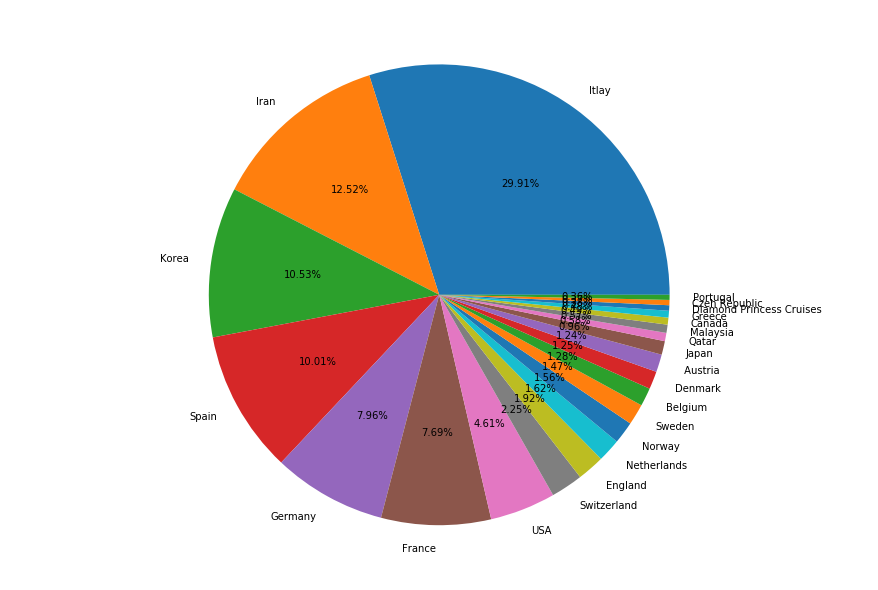

In [29]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.axis('equal')
langs = table['Province Name'][0:23]
students = table['ConfirmedCount'][0:23]
ax.pie(students, labels = langs,
       autopct='%1.2f%%'
       )

#plt.pie(table['Continents', table['ConfirmedCount']])
plt.show()

In [0]:
# convert the confirmed count from string to int
table['sort'] = table['ConfirmedCount'].str.extract('(\d+)', expand=False).astype(int)
table.sort_values('sort',inplace=True)
table = table.drop('sort', axis=1)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 23433 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 30465 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 28595 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 38376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 31119 missing from current font.
  font.set_

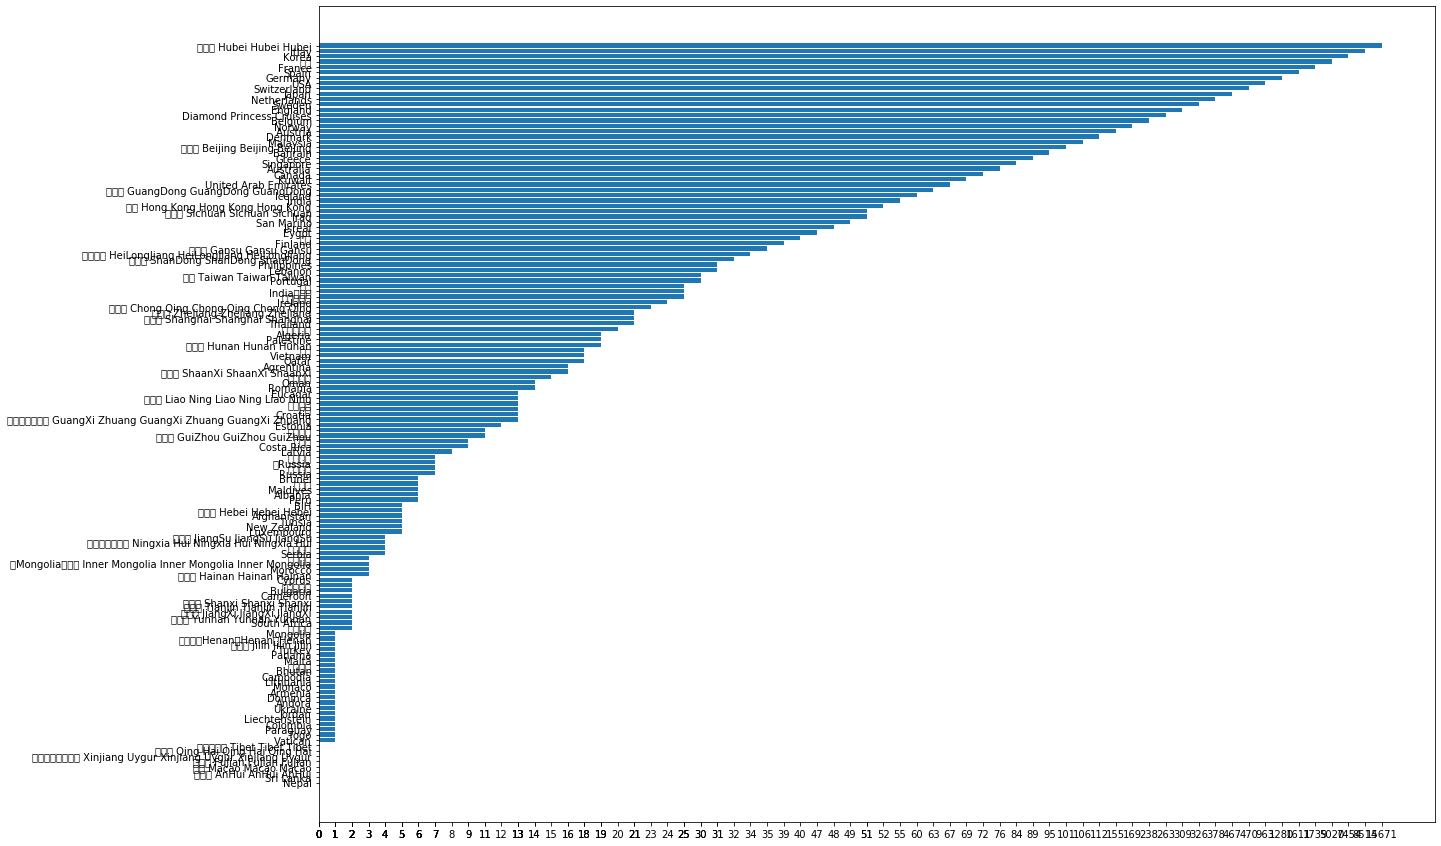

In [0]:
plt.figure(figsize = (20,15))
#table.sort_values(by='ConfirmedCount', inplace=True)
plt.barh(table['Province Name'],table['ConfirmedCount'])
_ = plt.xticks(table['ConfirmedCount'])

In [0]:
table

,Country Type,Continents,Province Name,Province Short Name,ConfirmedCount,SuspectedCount,CuredCount,DeadCount
66,1,China,西藏自治区 Tibet,"""西藏""",0,1,0,1
65,1,China,青海省 Qing Hai,"""青海""",0,18,0,18
64,2,Europe,Russia,"""""",0,2,0,2
63,2,Asia,India,"""""",0,3,0,3
62,2,Asia,Sri Lanka,"""""",0,1,0,1
...,...,...,...,...,...,...,...,...
3,2,Other,Diamond Princess Cruises,"""""",699,705,0,0
2,2,Asia,伊朗,"""""",749,978,0,175
1,2,Europe,Itlay,"""""",1577,1694,0,83
0,2,Asia,Korea,"""""",4283,4335,0,30


In [0]:
! pip install pyplotz

  Created wheel for pyplotz: filename=pyplotz-0.24-cp36-none-any.whl size=3666 sha256=d9f7ae09b6c20fd79e560ce847ebc81224dbac21f4659cf114ea5242367fd327
  Stored in directory: /root/.cache/pip/wheels/c2/60/51/0dd5298dfbd33ea0dc7fa6e860903199d685249a1ab3362c89
Successfully built pyplotz


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.font_manager as fm
path = 'chinese.simhei.ttf'
fontprop = fm.FontProperties(fname=path, size=10)

plt.rcParams['font.sans-serif'] = ['chinese.simhei.ttf']
plt.rcParams['font.serif'] = ['chinese.SimHei.ttf']

plt.rcParams['axes.unicode_minus'] = False
figure = plt.figure(figsize=(38,14),dpi=80)
#ax = figure.add_axes((0.1, 0.1, 0.8, 0.8))
plt.plot(table['Province Name'],table['ConfirmedCount'], color=(1, 0, 0, 1), linewidth=2.0, label='实际值', 
          )
#plt.plot(X_test,test_predict, 'c*-', color=(0, 0, 1, 1), linewidth=2.0, label='预测值')

plt.title("模型结果",fontproperties=fontprop)
plt.xlabel("X值",fontproperties=fontprop)
plt.ylabel("Y值",fontproperties=fontprop)
plt.legend(loc = "lower left",prop=fontprop)
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['chinese.simhei', 'Arial']})
plt.show()

FileNotFoundError: ignored

<Figure size 3040x1120 with 1 Axes>

try downloading
start downloading default chinese font(only for first time)
downloading complete
Font installed at the first time


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


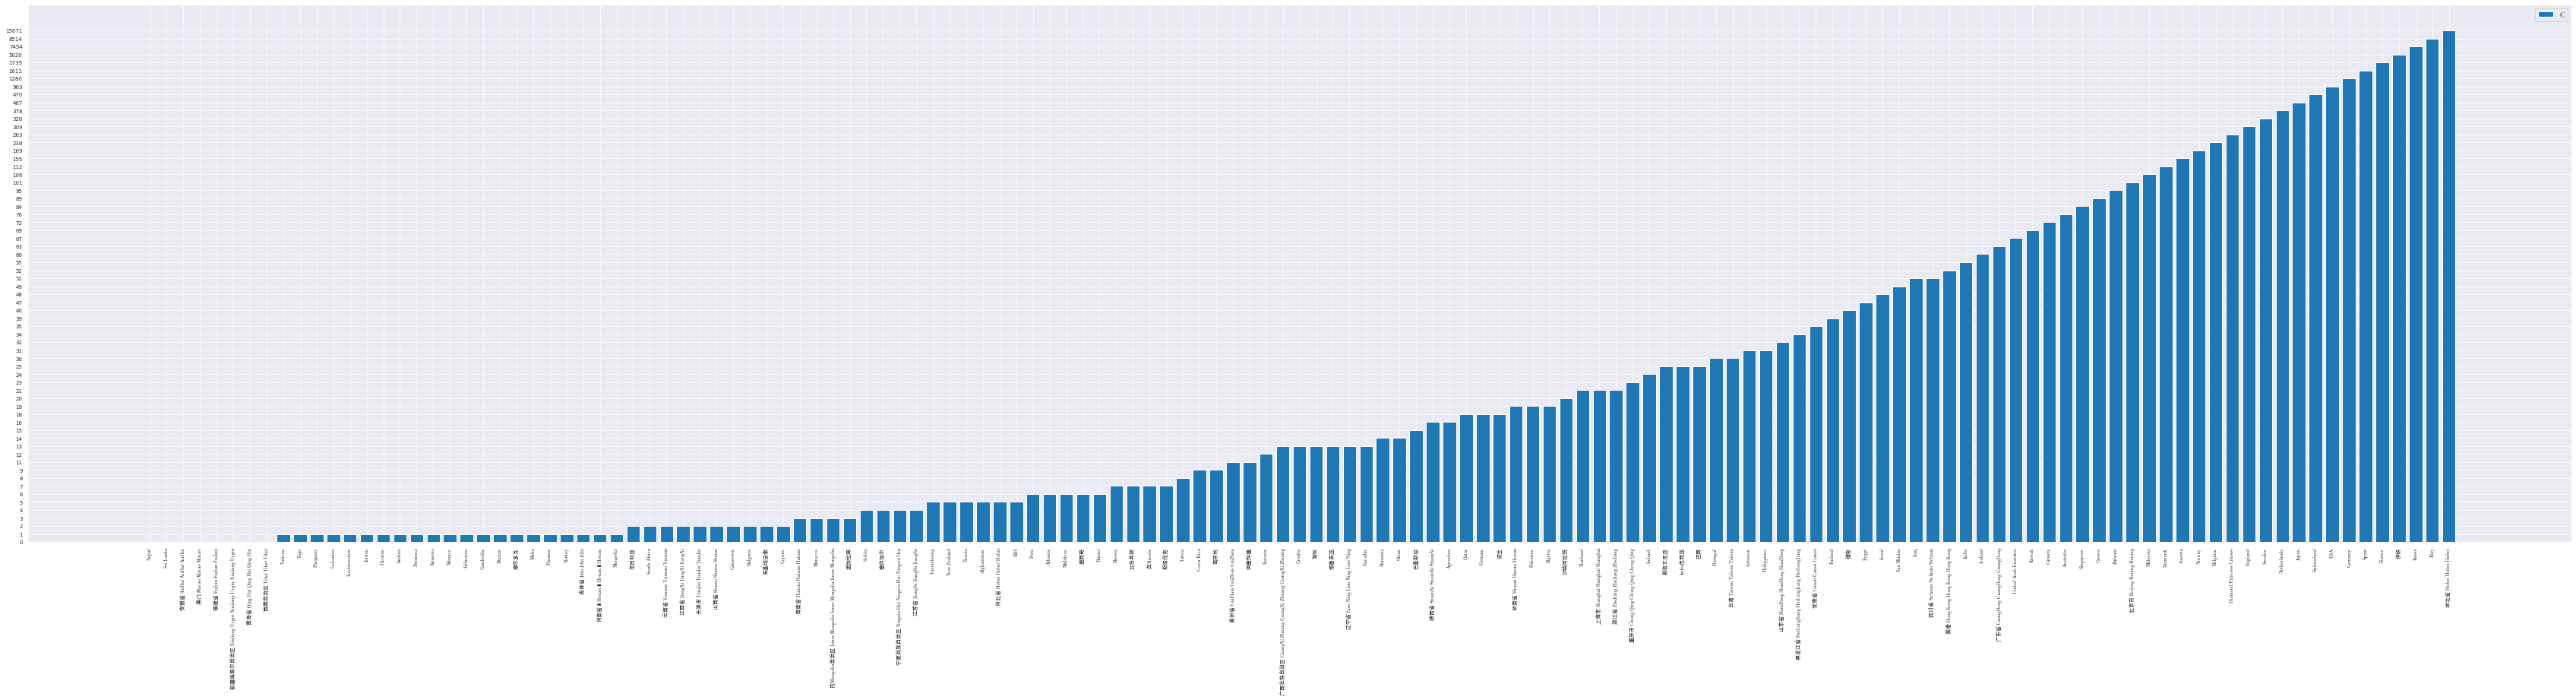

In [0]:
from pyplotz.pyplotz import PyplotZ
pltz = PyplotZ()
pltz.enable_chinese()
pltz.set_figure_size(60,13)
pltz.bar(table['Province Name'],table['ConfirmedCount'])

pltz.xticks(np.arange(len(table['Province Name'])),table['Province Name'],rotation='90')
pltz.legend('Confirmed Count')
pltz.automate_font_size(scale=.2) 
pltz.show()

In [30]:
# upload the csv file into colab
filename = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
filename_death = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
filename_recover = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'

data = pd.read_csv(filename)
data_death = pd.read_csv(filename_death)
data_recover = pd.read_csv(filename_recover)

data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428


In [0]:
data.drop([ 'Lat', 'Long'], axis = 1, inplace=True)
data_death.drop(['Lat','Long'],axis = 1, inplace =True)
data_recover.drop(['Lat','Long'], axis = 1, inplace = True)

In [32]:
data.fillna(0.0, inplace = True)
data_death.fillna (0.0 , inplace = True)
data_recover.fillna(0.0, inplace = True)
data.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,0,Thailand,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114
1,0,Japan,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839
2,0,Singapore,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226
3,0,Nepal,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,Malaysia,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428


In [33]:
import matplotlib.pyplot as plt

data_numbers = data[data.columns[2:]].astype(int)
data.drop(data.columns[2:],axis =1, inplace = True)
data = pd.concat([data, data_numbers], axis =1)
plt.figure(figsize=(25,10), dpi= 80)
#data.iloc[:,1:].plot.bar(figsize=(25,10))
#plt.plot(data['Province/State'],data['1/21/20 22:00'])
#plt.show()
data.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,0,Thailand,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114
1,0,Japan,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839
2,0,Singapore,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226
3,0,Nepal,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,Malaysia,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428


<Figure size 2000x800 with 0 Axes>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


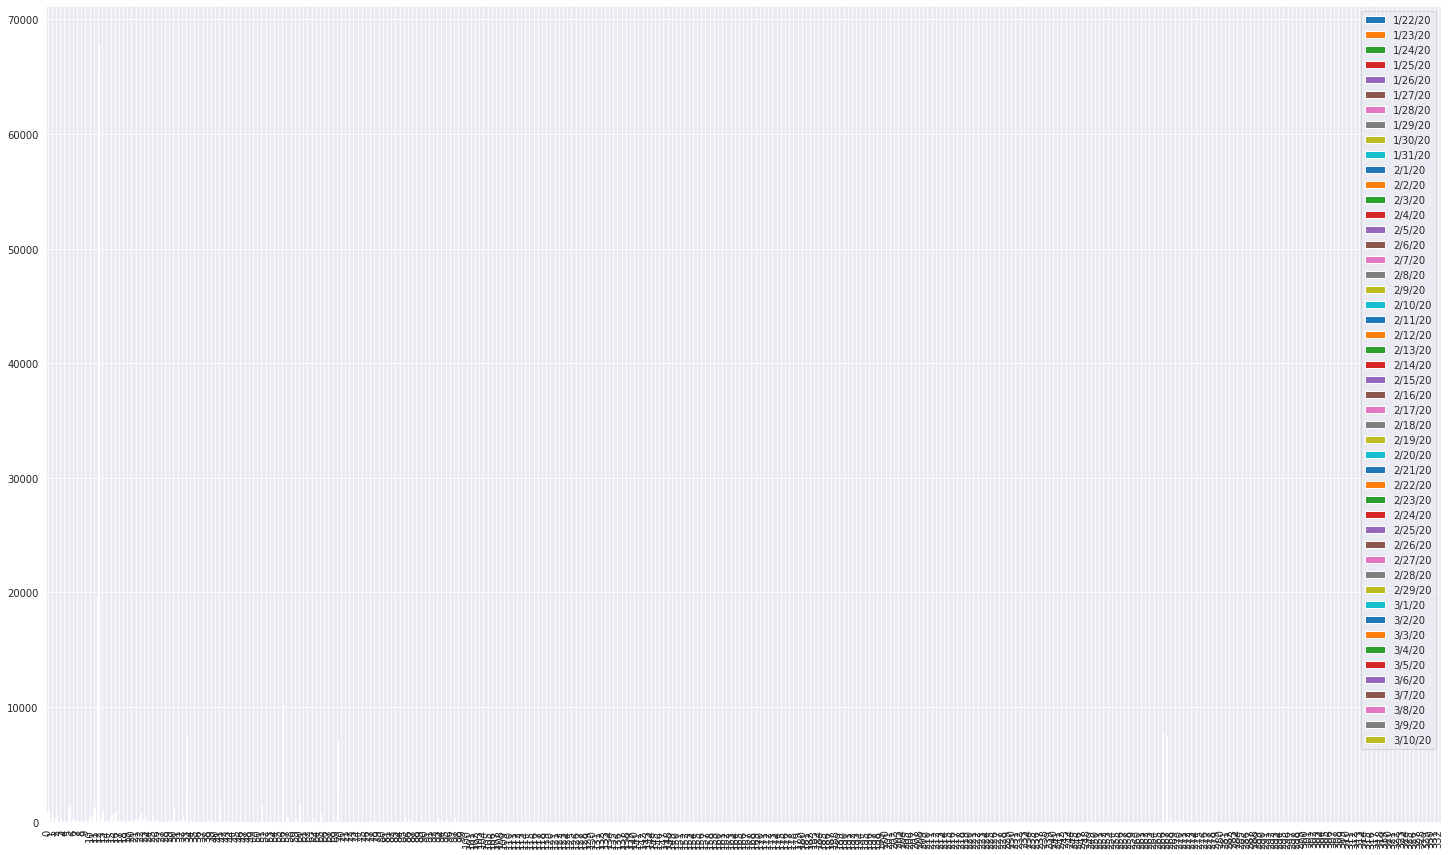

In [0]:
data.plot.bar(figsize = (25,15))

In [0]:
data.iloc[12,1:]

Country/Region    Mainland China
1/22/20                      444
1/23/20                      444
1/24/20                      549
1/25/20                      761
1/26/20                     1058
1/27/20                     1423
1/28/20                     3554
1/29/20                     3554
1/30/20                     4903
1/31/20                     5806
2/1/20                      7153
2/2/20                     11177
2/3/20                     13522
2/4/20                     16678
2/5/20                     19665
2/6/20                     22112
2/7/20                     24953
2/8/20                     27100
2/9/20                     29631
2/10/20                    31728
2/11/20                    33366
2/12/20                    33366
2/13/20                    48206
2/14/20                    54406
2/15/20                    56249
2/16/20                    58182
2/17/20                    59989
2/18/20                    61682
2/19/20                    62031
2/20/20   

In [34]:
data.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,1.233333,1.451111,2.091111,3.186667,4.706667,6.504444,12.395556,13.702222,18.297778,22.060000,26.751111,37.304444,44.180000,53.093333,61.411111,68.482222,76.424444,82.488889,89.222222,95.026667,99.560000,100.491111,134.151111,148.633333,153.400000,158.275556,162.795556,166.968889,168.086667,169.326667,170.717778,174.620000,175.477778,176.817778,178.695556,180.877778,183.897778,186.933333,191.135556,196.375556,200.680000,206.311111,211.377778,217.515556,226.186667,235.157778,243.988889,252.357778,263.537778,279.700000,285.206667,322.651111,346.882222,372.108889
std,20.982255,21.067683,26.241862,36.538058,51.076459,68.827930,168.705761,169.800801,233.964525,277.405203,341.341674,530.258560,640.970048,789.905999,930.795262,1046.310419,1180.299673,1281.610846,1400.875049,1499.708960,1576.937944,1577.239510,2275.241374,2567.167270,2654.032405,2745.113072,2830.245129,2910.004817,2926.478018,2945.837876,2956.290912,3023.269058,3023.332402,3032.977595,3056.546334,3075.631283,3095.417105,3111.251968,3132.796140,3161.567115,3173.155306,3182.885929,3191.873253,3202.950366,3216.556373,3230.259176,3243.258522,3258.570975,3271.318709,3297.483042,3305.336467,3378.534225,3441.891229,3515.186976
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [0]:
df = data.T # transpose rows to columns



In [36]:
#df.drop(0, axis = 1 , inplace= True)
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449
3/11/20,59,639,178,1,149,39,65,21,20,3,2,1908,59,74,49,62,12462,500,2277,9,314,60,0,61,71,18,7,195,72,20,19,652,246,109,19,38,24,99,7,598,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0
3/12/20,70,639,178,1,149,46,65,21,20,3,2,2078,59,85,52,73,12462,599,2277,9,314,67,0,61,71,18,7,195,80,24,19,652,302,131,20,52,24,99,7,702,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0
3/13/20,75,701,200,1,197,64,92,36,35,5,6,3675,155,85,64,82,17660,814,5232,16,559,80,0,77,101,19,7,189,80,26,32,1139,504,161,28,151,25,190,14,996,...,4,2,1,1,1,2,2,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0
3/14/20,82,773,212,1,238,64,112,49,46,7,10,4585,225,85,111,102,21157,961,6391,19,689,109,0,93,110,19,11,210,104,37,38,1359,655,193,31,151,30,228,14,1090,...,4,2,1,1,1,2,2,1,1,6,4,3,3,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,0,5,0,0,0,0,0,0,0,0,0
3/15/20,114,839,226,1,428,73,134,57,61,7,18,5795,244,98,140,113,24747,1022,7798,20,886,110,0,110,116,22,16,214,112,48,49,2200,860,251,53,162,33,331,14,1221,...,4,2,1,1,1,2,2,3,1,12,4,6,5,2,2,2,2,10,1,1,1,1,1,1,1,2,1,1,1,0,7,3,2,1,1,1,1,1,1,1


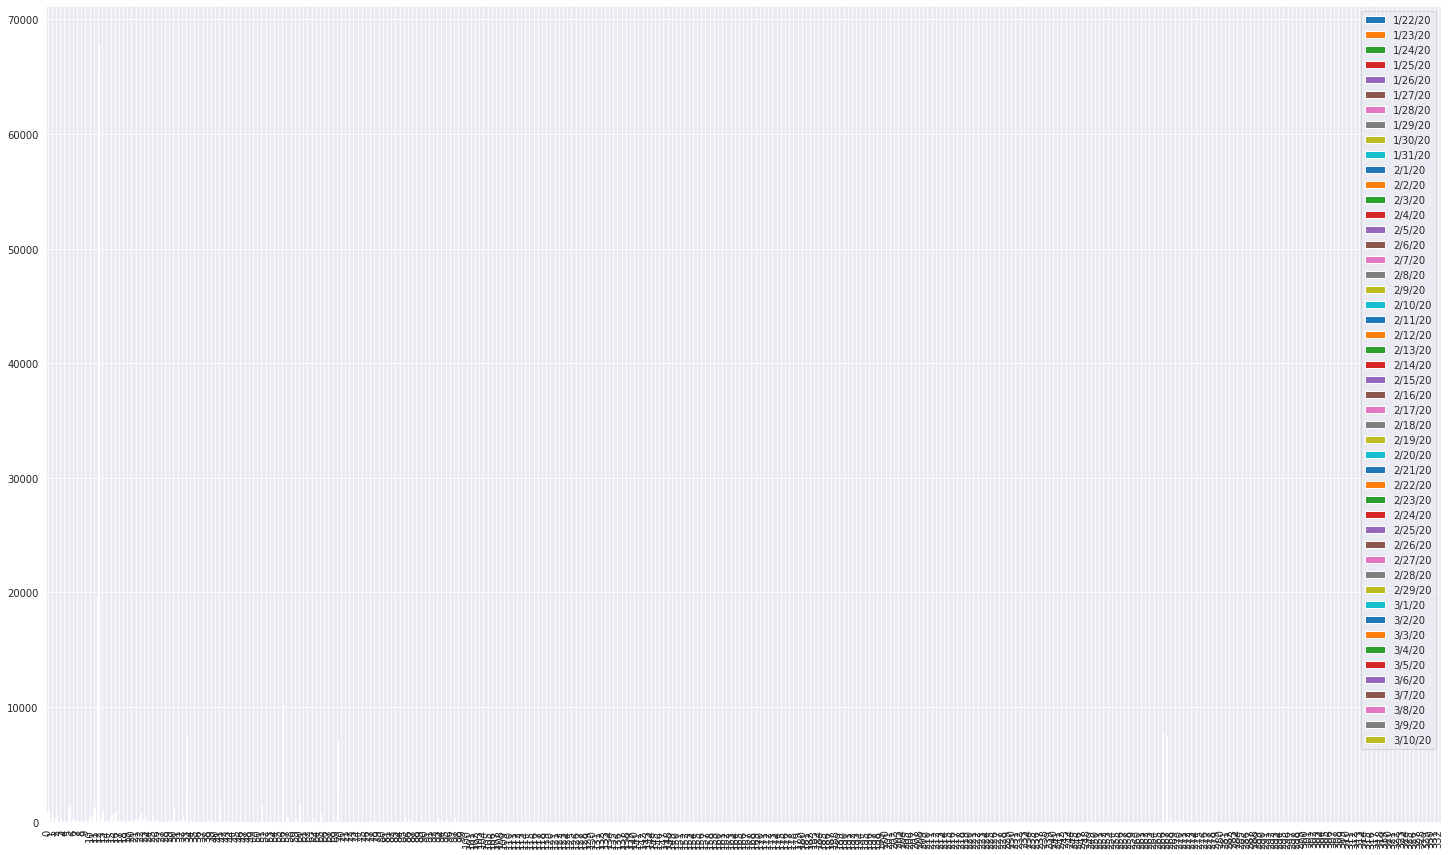

In [0]:
data.plot(figsize=(25,15),kind = 'bar')

In [37]:
len(df[0])

56

In [0]:
# taking the first province as a subject

df_test = df[0]


In [39]:
df_test.shape

(56,)

In [40]:
!  pip install pmdarima

     |████████████████████████████████| 1.5MB 2.9MB/s 


In [41]:
df_test

Province/State           0
Country/Region    Thailand
1/22/20                  2
1/23/20                  3
1/24/20                  5
1/25/20                  7
1/26/20                  8
1/27/20                  8
1/28/20                 14
1/29/20                 14
1/30/20                 14
1/31/20                 19
2/1/20                  19
2/2/20                  19
2/3/20                  19
2/4/20                  25
2/5/20                  25
2/6/20                  25
2/7/20                  25
2/8/20                  32
2/9/20                  32
2/10/20                 32
2/11/20                 33
2/12/20                 33
2/13/20                 33
2/14/20                 33
2/15/20                 33
2/16/20                 34
2/17/20                 35
2/18/20                 35
2/19/20                 35
2/20/20                 35
2/21/20                 35
2/22/20                 35
2/23/20                 35
2/24/20                 35
2/25/20                 37
2

0.0 Thailand


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed

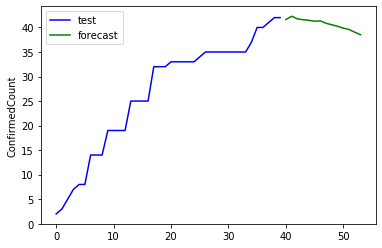

In [42]:
country = df_test[0]
state = df_test[1]
print(country, state)
y = df_test.drop(['Province/State', 'Country/Region'], axis = 0)

import pmdarima as pm
from pmdarima.model_selection import train_test_split

train, test = train_test_split(y, train_size=40)

# Fit your model
model = pm.auto_arima(train, seasonal=True, m=5)

# make your forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(y.shape[0])
plt.plot(x[:40], train, c='blue')
plt.plot(x[40:], forecasts, c='green')
plt.ylabel('ConfirmedCount')
plt.legend(labels = ('test','forecast'))
plt.show()

<Figure size 720x360 with 0 Axes>

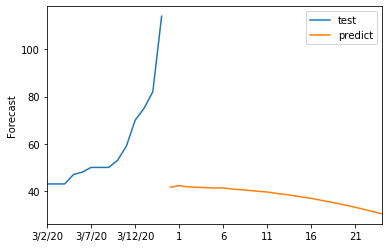

In [43]:
 # forecast next 25 days

future_forecast = model.predict(n_periods= 25)
# create a new dataframe for predicted numbers
future_forecast = pd.DataFrame(future_forecast,columns=['Prediction'])
# join the test and predicted model data into a single dataframe
newdata = pd.concat([test,future_forecast])
plt.figure(figsize=(10,5))
newdata.plot()
plt.ylabel('Forecast')
plt.legend(labels=('test','predict'))
plt.show()

Countrty : 0.0  state : Thailand


,additional
0,1
1,2
2,2
3,1
4,0
5,6
6,0
7,0
8,5
9,0


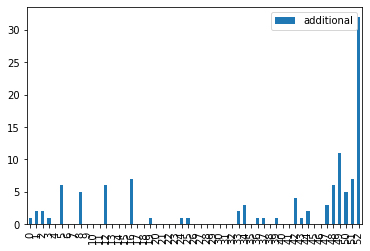

In [44]:
# find the delta in growth

def case_delta(country):
  first = df.iloc[2,country]
  countrytype = df.iloc[0,country]
  state = df.iloc[1,country]
  print('Countrty :' ,countrytype, ' state :' ,state)
  data_growth = []
  for x in df.iloc[3:,country]:
    y = x - first
    data_growth.append(y)
    first = x

  data_growth = pd.DataFrame(data_growth,  columns = ['additional'])
  data_growth.plot(kind='bar')
  return data_growth

countryname = 0 # define the province/state
case_delta(countryname)

In [45]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449
Province/State,0,0,0,0,0,British Columbia,New South Wales,Victoria,Queensland,0,0,0,0,0,0,0,0,0,0,South Australia,0,0,From Diamond Princess,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,Manitoba,Saskatchewan,0,0,0,0,Grand Princess,0,0,Alabama,0,0,Puerto Rico,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Virgin Islands, U.S.",0,French Guiana,Guam,0,Newfoundland and Labrador,Prince Edward Island,0,0,0,Mayotte,0
Country/Region,Thailand,Japan,Singapore,Nepal,Malaysia,Canada,Australia,Australia,Australia,Cambodia,Sri Lanka,Germany,Finland,United Arab Emirates,Philippines,India,Italy,Sweden,Spain,Australia,Belgium,Egypt,Australia,Lebanon,Iraq,Oman,Afghanistan,Bahrain,Kuwait,Algeria,Croatia,Switzerland,Austria,Israel,Pakistan,Brazil,Georgia,Greece,North Macedonia,Norway,...,Canada,Canada,Ethiopia,Sudan,Guinea,Aruba,Canada,Kenya,Antigua and Barbuda,US,Uruguay,Ghana,US,Jersey,Namibia,Seychelles,Trinidad and Tobago,Venezuela,Curacao,Eswatini,Gabon,Guatemala,Guernsey,Mauritania,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,Suriname,US,occupied Palestinian territory,France,US,Kosovo,Canada,Canada,Central African Republic,Congo (Brazzaville),Equatorial Guinea,France,Uzbekistan


Countrty : 0.0  state : Romania


,additional
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


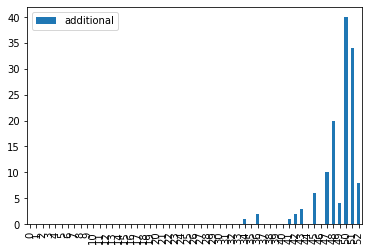

In [46]:
countryname=40
case_delta(countryname)

Countrty : 0.0  state : Romania


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters f

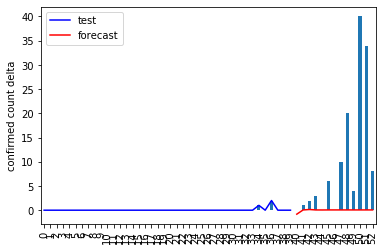

In [47]:
y = case_delta(countryname)
train , test = train_test_split(y,train_size=40)

model = pm.auto_arima(train, seasonal=True, m = 5)
forecasts = model.predict(test.shape[0])
x = np.arange(y.shape[0])
plt.plot(x[:40],train, c='blue')
plt.plot(x[40:], forecasts, c='red')
plt.ylabel('confirmed count delta')
plt.legend(labels = ['test','forecast'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


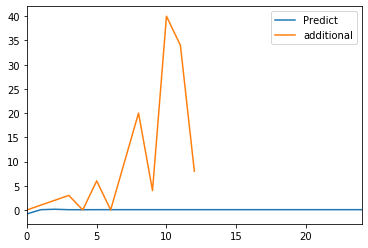

In [48]:
future_forecast = model.predict(n_periods=25)
future_forecast = pd.DataFrame(future_forecast, columns=['Predict'])
test = test.reset_index(drop=True)
new_data = pd.concat([ test,future_forecast])
new_data.plot.line()

In [49]:
data.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,0,Thailand,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114
1,0,Japan,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839
2,0,Singapore,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226
3,0,Nepal,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,Malaysia,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428


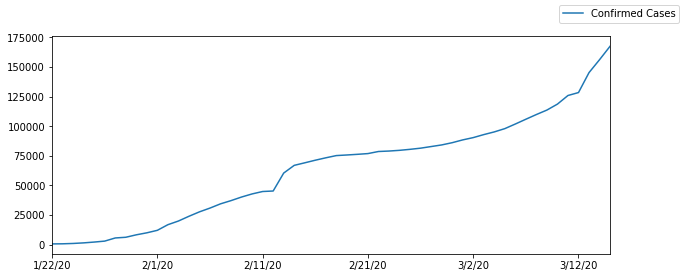

In [50]:
import matplotlib.pyplot as plt

ax, fig = plt.subplots()

data_sum =data.sum()
data_sum.plot(figsize=(10,4))
ax.legend(['Confirmed Cases'])


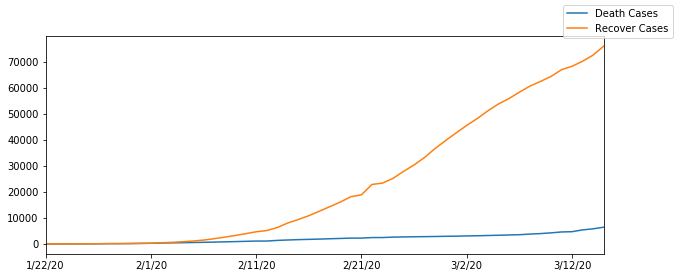

In [51]:
data_death_sum = data_death.sum()
data_recover_sum = data_recover.sum()
ax,fig = plt.subplots()
data_death_sum.plot(figsize=(10,4))
data_recover_sum.plot(figsize=(10,4))
ax.legend(['Death Cases','Recover Cases'])


In [0]:
# convert the string date index to time data format
data_sum.index=pd.to_datetime(data_sum.index)
data_death_sum.index = pd.to_datetime(data_death_sum.index)
data_recover_sum.index = pd.to_datetime(data_recover_sum.index)

In [0]:
# sum the count each day
data_sum.resample('D').sum().inplace=True
data_death_sum.resample('D').sum().inplace = True
data_recover_sum.resample('D').sum().inplace = True



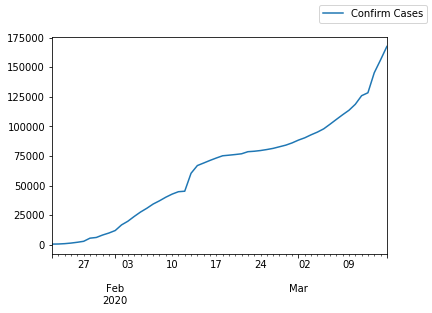

In [54]:
ax, fig = plt.subplots()
data_sum.plot()
ax.legend(['Confirm Cases'])

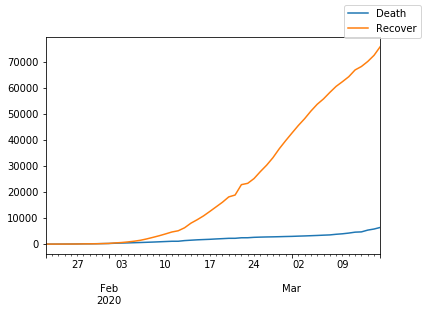

In [55]:
ax,fig = plt.subplots()
data_death_sum.plot()
data_recover_sum.plot()
ax.legend(['Death', 'Recover'])

In [0]:
def rate_of_growth(table):
  tmp = 0
  y = []
  for x in table:
    z = x - tmp
    y.append(z)
    tmp = x
  return y

data_sum_grow = rate_of_growth(data_sum)
data_recover_sum_grow = rate_of_growth(data_recover_sum)
data_death_sum_grow = rate_of_growth(data_death_sum)

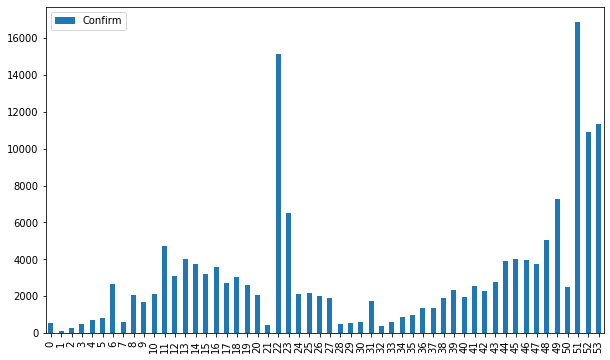

In [57]:
# rate of growth
pd.DataFrame(data_sum_grow).plot(kind= 'bar', figsize = (10,6))
plt.legend(['Confirm'])

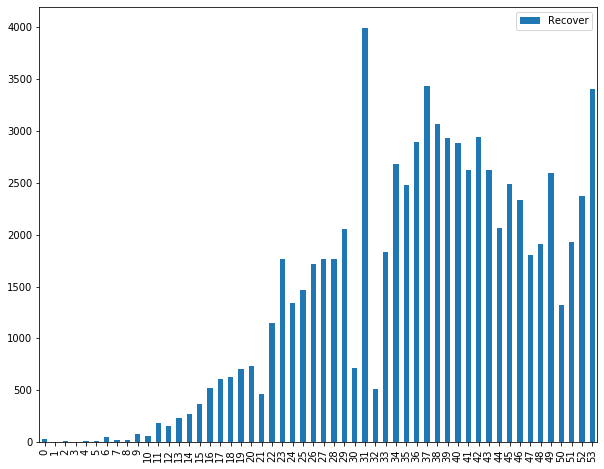

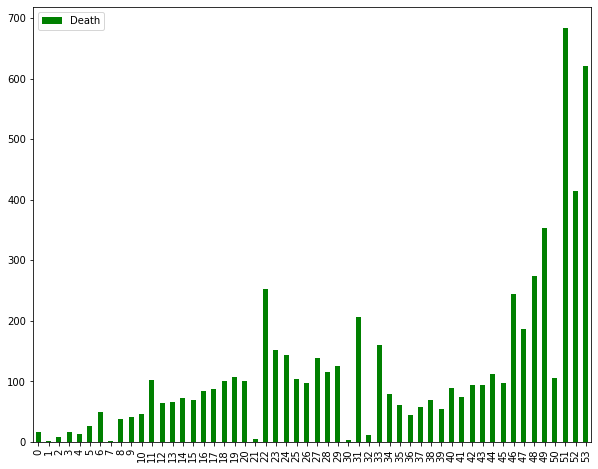

In [58]:

pd.DataFrame(data_recover_sum_grow).plot(kind='bar', figsize = (10,8))
plt.legend(['Recover'])
pd.DataFrame(data_death_sum_grow).plot(kind = 'bar',figsize = (10,8),color ='green')
plt.legend(['Death'])


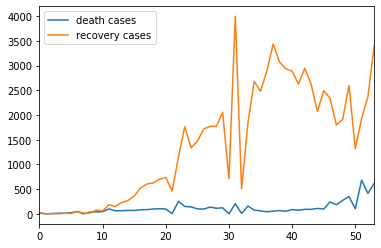

In [59]:
pd.DataFrame({'death cases':data_death_sum_grow, 'recovery cases':data_recover_sum_grow}).plot()


In [60]:
! pip install geopandas

import geopandas as gpd

from shapely.geometry import Point, Polygon

import missingno as msn
import descartes
import seaborn as sns
import matplotlib.pyplot as plt
import fiona
from shapely import wkt
% matplotlib inline

     |████████████████████████████████| 931kB 2.9MB/s 
     |████████████████████████████████| 14.7MB 320kB/s 
     |████████████████████████████████| 10.4MB 52.4MB/s 


In [0]:
countries = pd.read_csv(filename) 
crs = {'init': 'epsg4326'}


In [62]:
gdf = gpd.GeoDataFrame(countries, geometry=gpd.points_from_xy(countries.Long, countries.Lat))

gdf.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,geometry
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,POINT (101.00000 15.00000)
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,POINT (138.00000 36.00000)
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,POINT (103.83330 1.28330)
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,POINT (84.25000 28.16670)
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,POINT (112.50000 2.50000)


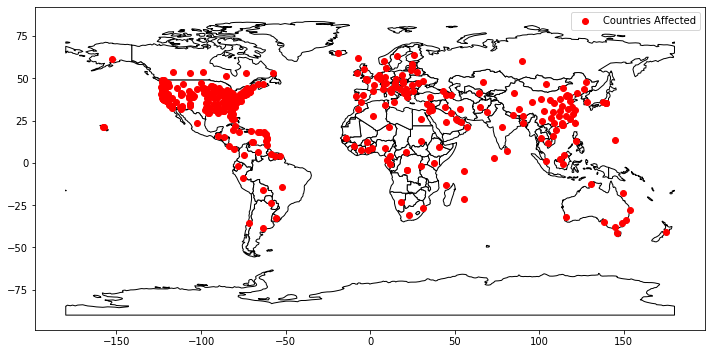

In [63]:
#world = gpd.read_file(gdf)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world.plot(color='white', edgecolor='black', figsize=(12,10))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')
ax.legend(['Countries Affected'])
plt.show()

In [71]:
print('Number of Countries affected :- ',len(gdf['Country/Region'].unique()))

Number of Countries affected :-  147
